<a href="https://colab.research.google.com/github/pgallino/Organizacion-de-datos-TP1-1C2023/blob/main/heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import squarify as squarify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/refrigeramiento.csv')
df.head(20)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,28,USD,"14,838,277.50",USD,"14,838,277.50",Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2017,NaT,7,USD,"2,659,494.60",USD,"2,659,494.60",Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,"50,688.00",USD,"50,688.00",Closed Won,Prod_Category_A_None
8,24353,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,"15,600.00",JPY,"470,400.00",Closed Lost,Prod_Category_A_None
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Q1,2016,NaT,0,JPY,"4,400.00",JPY,"470,400.00",Closed Lost,Prod_Category_A_None


In [ ]:
df_stage = df[['Stage','ID']]

In [ ]:
df_stage = df_stage.groupby(['Stage']).count()

In [ ]:
df_stage

,ID
Stage,
Closed Lost,7350
Closed Won,9533
Negotiation,18
Proposal,35
Qualification,11


In [ ]:
matriz = df.pivot_table(values='ID', index='Region', columns='Stage', aggfunc='count').fillna(0)

In [ ]:
matriz

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Region,,,,,
APAC,"1,355.00","1,896.00",0.00,8.00,3.00
Americas,"2,140.00","1,793.00",8.00,4.00,0.00
EMEA,"2,189.00","2,471.00",1.00,3.00,0.00
Japan,"1,546.00","3,323.00",1.00,14.00,8.00
Middle East,120.00,50.00,8.00,6.00,0.00


In [ ]:
matriz['Closed Lost2'] = matriz['Closed Lost'] / (matriz['Closed Lost'] + matriz['Closed Won'])
matriz['Closed Won2'] = matriz['Closed Won'] / (matriz['Closed Lost'] + matriz['Closed Won'])

In [ ]:
matriz

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification,Closed Lost2,Closed Won2
Region,,,,,,,
APAC,"1,355.00","1,896.00",0.00,8.00,3.00,0.42,0.58
Americas,"2,140.00","1,793.00",8.00,4.00,0.00,0.54,0.46
EMEA,"2,189.00","2,471.00",1.00,3.00,0.00,0.47,0.53
Japan,"1,546.00","3,323.00",1.00,14.00,8.00,0.32,0.68
Middle East,120.00,50.00,8.00,6.00,0.00,0.71,0.29


In [ ]:
matriz = matriz[['Closed Lost2','Closed Won2']]
matriz = matriz.rename(columns={'Closed Lost2':'NO','Closed Won2':'SÍ'})

In [ ]:
matriz

Stage,NO,SÍ
Region,,
APAC,0.42,0.58
Americas,0.54,0.46
EMEA,0.47,0.53
Japan,0.32,0.68
Middle East,0.71,0.29


Text(442.3150000000001, 0.5, 'Región')

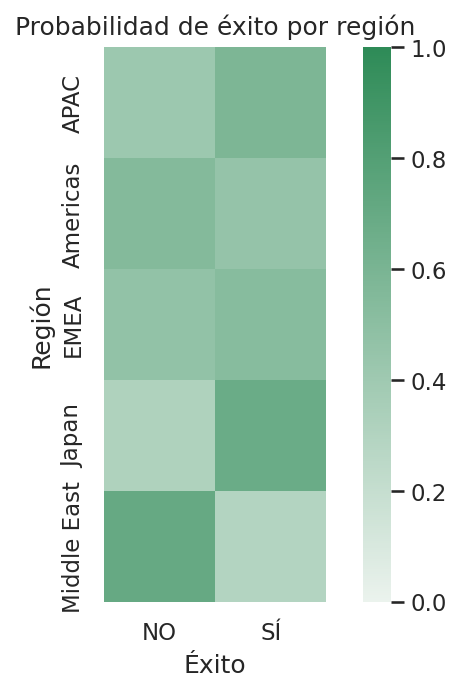

In [ ]:
plt.figure(dpi=150)
plt.title("Probabilidad de éxito por región")
sns.heatmap(matriz, square=True, cmap=sns.light_palette("seagreen", as_cmap=True),vmin=0,vmax=1)
plt.xlabel("Éxito")
plt.ylabel("Región")